<a href="https://colab.research.google.com/github/DoubleCyclone/Credit-Card-Fraud-Detection/blob/main/notebooks/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit Card Fraud was and is an ongoing issue since they have been a thing. As the businesses grow and technology advances, ways to commit fraud also evolve. For this reason, it is of utmost importance that individuals and businesses adopt the most up-to-date and successful fraud prevention/detection mechanisms. This might mostly fall under Cyber Security but as a Machine Learning (self proclaimed) student, I will be working with the dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data in order to discuss how to make data and/or classification models better so that the model is the best it can be at detecting real credit card fraud and avoids flagging genuine transactions as potentially fraud.

I will start by mounting my Google Drive to which I uploaded the dataset.

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

In [51]:
# Mount the Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1 - Data Understanding
It can be said that learning about the data is paramount when it comes to training models so I will load the dataset and then immediately start visualising.

In [52]:
# Load the dataset
X = pd.read_csv('/content/drive/MyDrive/Colab_Materials/Credit_Card_Fraud_Detection/creditcard.csv')

# Print shape
print(f"Shape of the full Dataset : {X.shape}\n")

# display first few rows
X.head()

Shape of the full Dataset : (284807, 31)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


A dataset with 284807 records and 31 features. I want to learn a lot more about this data so let's start with that.

In [53]:
# Print Unique Data Types
print(f"Feature types : {set(X.dtypes.tolist())}")
print(f"Features with missing data : {[col for col in X if X[col].isna().any()]}")

Feature types : {dtype('float64'), dtype('int64')}
Features with missing data : []


That is interesting. This Dataset includes only numerical features and there are no columns with missing data so I don't need to manage them myself. (I could just simulate it myself but I think we have more important matters at hand right now). For the record, a Class of 1 means the transaction is fraudulent and 0 means that the transaction is genuine.

In [54]:
# Set this to show all columns
pd.set_option('display.max_columns', None)

# Display information about all columns of the data
X.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Most of the features look close in range to each other which is great but I will have to normalize **Time** and **Amount** later on so that they don't affect the model more than the other features which are overall a lot smaller in magnitude. For now, let's take the label (**Class**) out of our dataset so that I don't train the model with it.

In [55]:
# Create a label dataframe
y = pd.DataFrame()
y['Class'] = X['Class'].copy()

Now that the labels are separated, let's start visualizing and collecting more information about the data. Starting with the labels as it is just one column and can only take 2 values.

Fraudulent Transaction Count = 492
Genuine Transaction Count = 284315



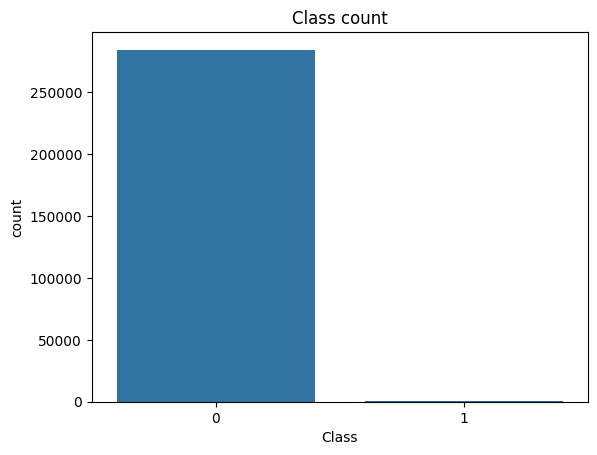

In [56]:
# Display the count plot for the label
_ = sns.countplot(data=y, x="Class").set(title="Class count")

# Print the counts
print(f"Fraudulent Transaction Count = {(y['Class'] == 1).sum()}")
print(f"Genuine Transaction Count = {(y['Class'] == 0).sum()}\n")

Wow, the class imbalance here is a big problem. Overwhelmingly large portion of our labels are 0 (Genuine transactions). Fraudulent transactions' count being this low is usually a good thing but to train a Classification Model as well as possible, I need a more balanced dataset. For now, let's visualise the features' distributions as well.

In [57]:
def hist_plot_all_features(df : pd.DataFrame):
  n_cols = 6
  n_rows = int(np.ceil(len(df.columns) / n_cols))

  # Create a composite plot for all the features
  fig, axs = plt.subplots(n_rows, n_cols, figsize=(24, n_rows * 4))

  # Flatten multi-dimensional into one-dimensional to easily iterate through
  axs = axs.flatten()

  # Iterate through the columns and plot their histograms
  for i, col in tqdm(enumerate(df.columns), total=len(df.columns), desc="Plotting", ncols=100) :
    sns.histplot(data=df, x=col, ax=axs[i], bins=30, kde=True)

  # Hide any unused subplots
  for j in range(i + 1, len(axs)):
      axs[j].set_visible(False)

  # Fix the overlap
  fig.tight_layout()
  plt.show()

Plotting: 100%|█████████████████████████████████████████████████████| 30/30 [00:58<00:00,  1.95s/it]


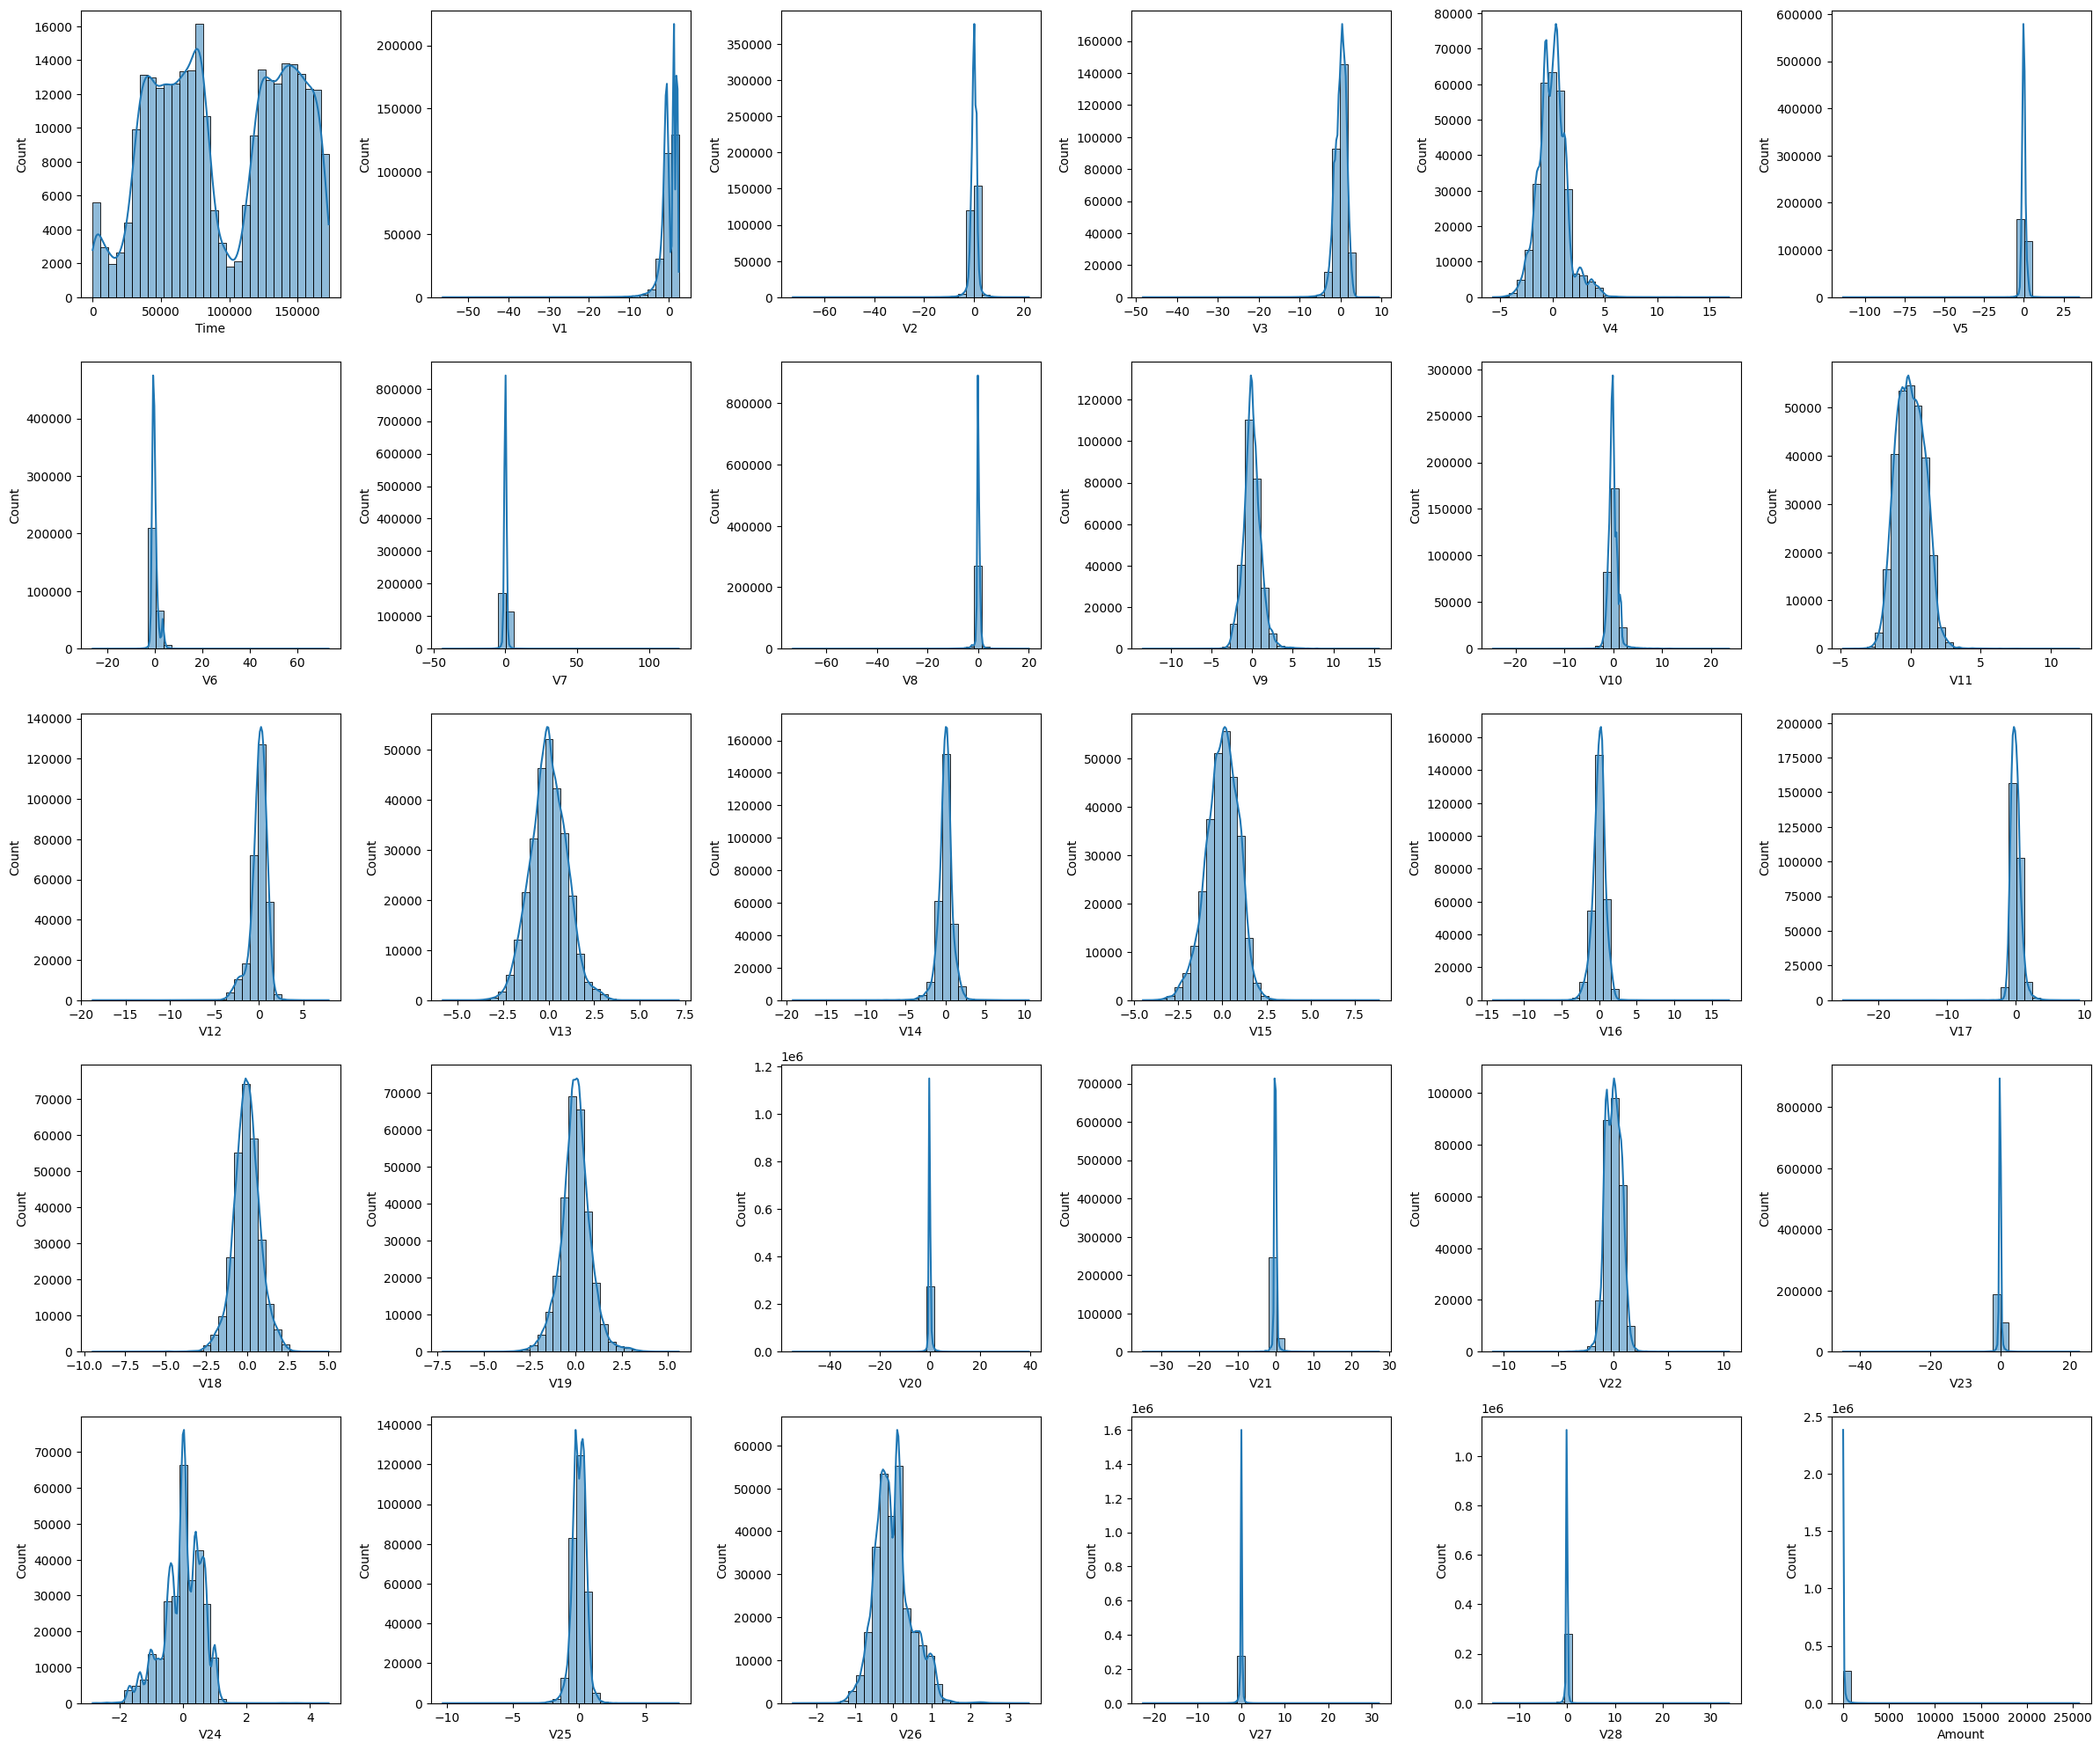

In [58]:
# Optional plotting (takes some time to run)
hist_plot_all_features(X.drop('Class', axis=1))

Most of our features's plots look like a normal distribution which is also useful. Maybe they have been normalized before the upload. Though I will still have to normalize at least a few of them as well to be consistent.

# 2 - Preprocessing
Now it is time to get the data to be the most useful it can be. There are a few things I can do so let's start by splitting the dataset and then normalizing the data to ensure no feature overwhelms the others' contributions. Looking at our distributions, I can see that the **Amount** feature is heavily skewed so I think it is the best to run **Power Transformer**. Specifically **Yeo-Johnson** because even though amount feature can never be a negative number, there are a few zeros here and there so the **Box-Cox** method would not work. For the **Time** feature, I will run **StandardScaler** (Z-Score Normalization) as it is not really skewed and resembles a normal distribution even if a little.

In [59]:
# Separate the data into train and test splits, stratify is important for imbalanced data
X_train, X_test, y_train, y_test  = train_test_split(X.drop('Class', axis=1), y, test_size=0.2, random_state=42, stratify=X['Class'])

After the split, let's transform our data

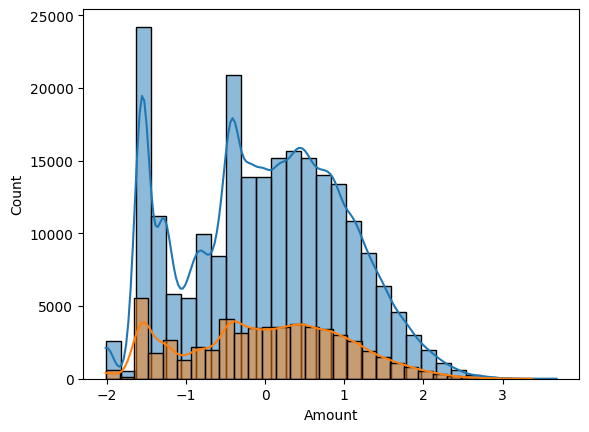

In [60]:
# Initialize Power Transformer, default is already Yeo-Johnson
pt = PowerTransformer()

# Initialize scaled DataFrames as copies of original data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Power Transform 'Amount'
X_train_scaled['Amount'] = pt.fit_transform(X_train_scaled[['Amount']])
X_test_scaled['Amount'] = pt.transform(X_test_scaled[['Amount']])

# Plot distribution
_ = sns.histplot(data=X_train_scaled, x='Amount', bins=30, kde=True)
_ = sns.histplot(data=X_test_scaled, x='Amount', bins=30, kde=True)

In [61]:
X_train_scaled["Amount"].describe()

,Amount
count,2.278450e+05
mean,2.879032e-16
std,1.000002e+00
min,-2.012876e+00
25%,-7.480678e-01
50%,2.608875e-02
75%,7.501829e-01
max,3.681538e+00


In [62]:
X_test_scaled["Amount"].describe()

,Amount
count,56962.000000
mean,-0.002778
std,1.001770
min,-2.012876
25%,-0.761722
50%,0.026089
75%,0.743117
max,3.371370


The distribution is not perfectly gaussian even with the transformation but the skewedness has been reduced and the range of the data is very similar to the other features (except for **Time** which has not been transformed yet). Just in case let's try log scaling as well.

/usr/local/lib/python3.12/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


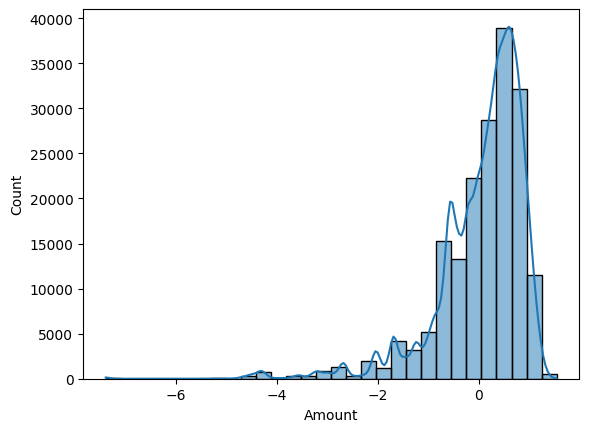

In [63]:
# Just plot log transformation without changing the data
_ = sns.histplot(data=np.log1p(X_train_scaled), x="Amount", bins=30, kde=True)

Still better than the original version but I think Power Transformer is the winner here because log transformed version is still skewed and most of the data resides in the 0-2 range which diverges from a gaussian distribution more than the power transformed one. Let's move on to **Time**.

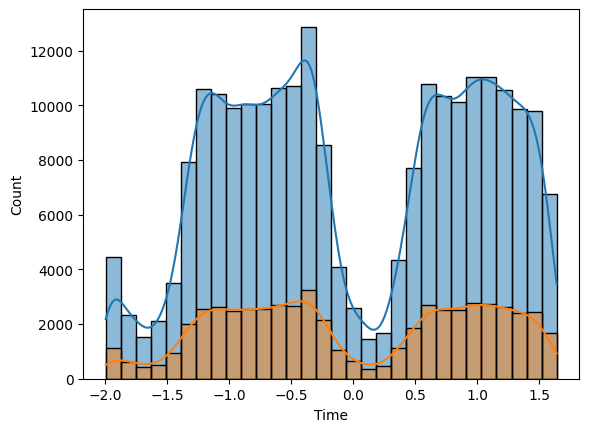

In [64]:
# Initialize Standard Scaler
ss = StandardScaler()

# Scale the Time
X_train_scaled['Time'] = ss.fit_transform(X_train_scaled[['Time']])
X_test_scaled['Time'] = ss.transform(X_test_scaled[['Time']])

# Plot the new distribution
_ = sns.histplot(data=X_train_scaled, x="Time", bins=30, kde=True)
_ = sns.histplot(data=X_test_scaled, x="Time", bins=30, kde=True)

In [65]:
X_train_scaled["Time"].describe()

,Time
count,2.278450e+05
mean,-1.407707e-16
std,1.000002e+00
min,-1.998073e+00
25%,-8.561495e-01
50%,-2.122647e-01
75%,9.366285e-01
max,1.640549e+00


In [66]:
X_test_scaled["Time"].describe()

,Time
count,56962.000000
mean,-0.007500
std,0.999960
min,-1.998031
25%,-0.858977
50%,-0.219182
75%,0.931985
max,1.640423


After scaling, **Time** keeps its bimodal distribution, although in a normalized range this time. This distribution's distinct look likely tells us that transactions were clustered in two different time periods so trying to make them gaussian-like would lead to information loss. Let's check out our DataFrame once again to confirm the transformations normalized the distributions well enough.

In [67]:
print(f"Min Value in Train Dataset = {np.min(X_train_scaled)}")
print(f"Max Value in Train Dataset = {np.max(X_train_scaled)}")

# Display Info
X_train_scaled.describe()

Min Value in Train Dataset = -113.743306711146
Max Value in Train Dataset = 120.589493945238


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278450e+05,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,2.278450e+05
mean,-1.407707e-16,0.000795,-0.000481,-0.000383,-0.000020,0.000175,-0.001171,0.000077,-0.000434,0.000702,-0.000389,-0.000787,0.002718,-0.000493,-0.000059,0.000744,-0.001070,0.000390,0.000056,0.000664,-0.000999,0.000370,0.000303,0.000050,-0.000277,-0.000655,0.000126,-0.000070,0.000154,2.879032e-16
std,1.000002e+00,1.958926,1.649092,1.515292,1.415867,1.379569,1.331218,1.238431,1.191482,1.097351,1.086252,1.019200,0.996509,0.994103,0.955993,0.915143,0.874243,0.844235,0.838874,0.813931,0.770806,0.734963,0.725735,0.627419,0.605322,0.521236,0.481939,0.404934,0.326939,1.000002e+00
min,-1.998073e+00,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-2.012876e+00
25%,-8.561495e-01,-0.919893,-0.598761,-0.891767,-0.847111,-0.692100,-0.768603,-0.553481,-0.207839,-0.640307,-0.535655,-0.761844,-0.401593,-0.648607,-0.425825,-0.582648,-0.469107,-0.483409,-0.499150,-0.455036,-0.211651,-0.228250,-0.542056,-0.161932,-0.354843,-0.316907,-0.326491,-0.070740,-0.052931,-7.480678e-01
50%,-2.122647e-01,0.018692,0.064746,0.179859,-0.021361,-0.054757,-0.274156,0.040420,0.023219,-0.050653,-0.093332,-0.031419,0.142381,-0.014348,0.049571,0.048400,0.065080,-0.065550,-0.003484,0.005351,-0.062606,-0.029280,0.006599,-0.010983,0.040778,0.016081,-0.051623,0.001463,0.011221,2.608875e-02
75%,9.366285e-01,1.315616,0.803876,1.026457,0.742281,0.611259,0.397501,0.570530,0.327824,0.598254,0.454469,0.737457,0.620148,0.661868,0.492066,0.649549,0.521521,0.400099,0.500425,0.459782,0.132702,0.186365,0.528282,0.147589,0.438966,0.349880,0.240835,0.091180,0.078118,7.501829e-01
max,1.640549e+00,2.451888,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.572113,39.420904,27.202839,10.503090,22.528412,4.584549,6.070850,3.517346,31.612198,33.847808,3.681538e+00


In [68]:
print(f"Min Value in Test Dataset = {np.min(X_test_scaled)}")
print(f"Max Value in Test Dataset = {np.max(X_test_scaled)}")

# Display Info
X_test_scaled.describe()

Min Value in Test Dataset = -50.6884193567503
Max Value in Test Dataset = 44.0544613631638


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,-0.007500,-0.003181,0.001924,0.001532,0.000079,-0.000698,0.004685,-0.000307,0.001736,-0.002807,0.001558,0.003149,-0.010872,0.001972,0.000234,-0.002976,0.004280,-0.001561,-0.000225,-0.002654,0.003996,-0.001479,-0.001211,-0.000202,0.001109,0.002622,-0.000504,0.000282,-0.000615,-0.002778
std,0.999960,1.957791,1.660157,1.520112,1.415887,1.382965,1.336478,1.231741,1.205777,1.103746,1.099188,1.026747,1.009835,0.999952,0.968944,0.916010,0.884240,0.869452,0.835388,0.814482,0.771395,0.732772,0.725571,0.612490,0.606951,0.521444,0.483381,0.398388,0.342373,1.001770
min,-1.998031,-37.558067,-42.172688,-32.454198,-5.263068,-40.427726,-19.996349,-31.197329,-50.688419,-9.481456,-22.187089,-4.339319,-18.553697,-3.848943,-18.822087,-4.152532,-13.563273,-23.815636,-9.264609,-4.384828,-28.009635,-22.757540,-8.887017,-26.751119,-2.822384,-7.495741,-1.855355,-9.845808,-8.412267,-2.012876
25%,-0.858977,-0.922012,-0.597742,-0.885412,-0.855101,-0.689776,-0.767032,-0.556383,-0.211144,-0.654460,-0.534021,-0.764437,-0.418841,-0.647824,-0.424276,-0.583642,-0.464043,-0.485494,-0.494149,-0.461808,-0.212152,-0.229432,-0.543363,-0.161485,-0.353306,-0.318244,-0.329162,-0.071348,-0.053144,-0.761722
50%,-0.219182,0.014539,0.069051,0.179703,-0.013487,-0.052099,-0.274488,0.039029,0.018431,-0.053372,-0.091538,-0.037253,0.130853,-0.010949,0.054825,0.046424,0.071516,-0.066223,-0.004110,-0.002132,-0.062045,-0.030054,0.007985,-0.011928,0.041618,0.018827,-0.053818,0.000895,0.011321,0.026089
75%,0.931985,1.315764,0.802856,1.029285,0.747315,0.615923,0.403490,0.570031,0.325590,0.593091,0.451679,0.750201,0.610965,0.664396,0.497441,0.645539,0.529540,0.398034,0.502237,0.454978,0.134361,0.186474,0.529293,0.147841,0.442355,0.354786,0.241305,0.090562,0.078955,0.743117
max,1.640423,2.454930,17.930550,4.226108,12.132323,28.762671,23.917837,44.054461,18.282168,9.125535,13.811758,11.619723,4.318071,4.316156,7.518403,5.667667,8.289890,7.293108,4.027806,5.591971,26.237391,27.202839,8.272233,19.002942,4.022866,7.519589,3.116200,10.507884,22.620072,3.371370


Turns out I should have read the earlier describe output more carefully. Some features' ranges are still very different like **V7**. What if I run StandardScaler on all of them (Except the ones I already scaled)?

In [69]:
# Create a list of columns to scale with StandardScaler (Time and V features)
columns_to_scale_ss = [col for col in X_train_scaled.columns if col not in ['Amount']]

# Revert Time so that it is not scaled multiple times
X_train_scaled["Time"] = X_train["Time"]
X_test_scaled["Time"] = X_test["Time"]

# Apply StandardScaler only to the selected columns
X_train_scaled[columns_to_scale_ss] = ss.fit_transform(X_train_scaled[columns_to_scale_ss])
X_test_scaled[columns_to_scale_ss] = ss.transform(X_test_scaled[columns_to_scale_ss])

print(f"Min Value in Train Dataset = {np.min(X_train_scaled)}")
print(f"Max Value in Train Dataset = {np.max(X_train_scaled)}")

# Display the first few rows to check the scaling
X_train_scaled.describe()

Min Value in Train Dataset = -82.44873202992598
Max Value in Train Dataset = 103.52912943247286


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05
mean,-1.407707e-16,8.420046e-19,-3.586316e-18,5.675735e-18,-2.058233e-18,-1.284837e-17,1.995863e-18,1.166332e-17,-6.143515e-18,-2.722482e-17,-5.800476e-18,-1.484423e-17,1.309785e-18,7.484485e-18,-4.864915e-18,-2.195449e-17,-2.432458e-18,-8.357675e-18,-1.203755e-17,1.765091e-17,4.428321e-18,-1.122673e-18,9.667460e-19,-1.060302e-18,1.524964e-17,-1.615401e-17,-1.964677e-18,-1.528082e-18,-6.424183e-18,2.879032e-16
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.998073e+00,-2.879560e+01,-4.409420e+01,-3.189174e+01,-4.013911e+00,-8.244873e+01,-1.965072e+01,-3.517146e+01,-6.144990e+01,-1.224293e+01,-2.263556e+01,-4.706336e+00,-1.875194e+01,-5.825756e+00,-2.009879e+01,-4.916936e+00,-1.616119e+01,-2.980597e+01,-1.132330e+01,-8.863418e+00,-7.070112e+01,-4.739129e+01,-1.506537e+01,-7.141626e+01,-4.685700e+00,-1.975069e+01,-5.404588e+00,-5.572677e+01,-4.719615e+01,-2.012876e+00
25%,-8.561495e-01,-4.699977e-01,-3.627943e-01,-5.882598e-01,-5.982859e-01,-5.018063e-01,-5.764897e-01,-4.469845e-01,-1.740737e-01,-5.841426e-01,-4.927646e-01,-7.467215e-01,-4.057284e-01,-6.519600e-01,-4.453670e-01,-6.374893e-01,-5.353634e-01,-5.730638e-01,-5.950923e-01,-5.598766e-01,-2.732892e-01,-3.110635e-01,-7.473244e-01,-2.581732e-01,-5.857482e-01,-6.067362e-01,-6.777168e-01,-1.745212e-01,-1.623687e-01,-7.480678e-01
50%,-2.122647e-01,9.135776e-03,3.955322e-02,1.189489e-01,-1.507303e-02,-3.981831e-02,-2.050642e-01,3.257605e-02,1.985136e-02,-4.679858e-02,-8.556257e-02,-3.005516e-02,1.401521e-01,-1.393705e-02,5.191442e-02,5.207504e-02,7.566546e-02,-7.810627e-02,-4.220355e-03,5.758707e-03,-7.992553e-02,-4.034219e-02,8.676018e-03,-1.758518e-02,6.782433e-02,3.210883e-02,-1.073769e-01,3.786328e-03,3.385246e-02,2.608875e-02
75%,9.366285e-01,6.711965e-01,4.877582e-01,6.776529e-01,5.242739e-01,4.429541e-01,2.994801e-01,4.606268e-01,2.755047e-01,5.445414e-01,4.187421e-01,7.243389e-01,6.195939e-01,6.662918e-01,5.147800e-01,7.089668e-01,5.977645e-01,4.734574e-01,5.964778e-01,5.640767e-01,1.734561e-01,2.530680e-01,7.275110e-01,2.351523e-01,7.256373e-01,6.725094e-01,4.994607e-01,2.253462e-01,2.384671e-01,7.501829e-01
max,1.640549e+00,1.251246e+00,1.337600e+01,6.192179e+00,1.191877e+01,2.522640e+01,5.506459e+01,9.737297e+01,1.679227e+01,1.421088e+01,2.186010e+01,1.179330e+01,7.873176e+00,7.169672e+00,1.101143e+01,9.700144e+00,1.980709e+01,1.096040e+01,6.009276e+00,6.845132e+00,5.114386e+01,3.701213e+01,1.447195e+01,3.590651e+01,7.574215e+00,1.164832e+01,7.298074e+00,7.806790e+01,1.035291e+02,3.681538e+00


In [70]:
print(f"Min Value in Test Dataset = {np.min(X_test_scaled)}")
print(f"Max Value in Test Dataset = {np.max(X_test_scaled)}")

# Display the first few rows to check the scaling
X_test_scaled.describe()

Min Value in Test Dataset = -42.63697310488427
Max Value in Test Dataset = 69.187083486369


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,-0.007500,-0.002030,0.001458,0.001264,0.000070,-0.000633,0.004399,-0.000310,0.001821,-0.003197,0.001793,0.003862,-0.013638,0.002480,0.000307,-0.004065,0.006119,-0.002311,-0.000335,-0.004076,0.006480,-0.002515,-0.002085,-0.000402,0.002290,0.006287,-0.001308,0.000870,-0.002351,-0.002778
std,0.999960,0.999423,1.006712,1.003183,1.000016,1.002464,1.003953,0.994601,1.012000,1.005829,1.011911,1.007407,1.013375,1.005886,1.013549,1.000950,1.011437,1.029872,0.995846,1.000679,1.000767,0.997021,0.999775,0.976208,1.002694,1.000401,1.002994,0.983836,1.047210,1.001770
min,-1.998031,-19.173238,-25.573036,-21.417574,-3.717199,-29.304793,-15.020249,-25.191133,-42.542060,-8.640969,-20.425047,-4.256811,-18.621464,-3.871288,-19.688498,-4.538401,-15.513109,-28.210249,-11.044195,-5.388054,-36.336901,-30.964787,-12.245976,-42.636973,-4.662171,-14.379486,-3.850042,-24.314484,-25.730899,-2.012876
25%,-0.858977,-0.471080,-0.362177,-0.584066,-0.603929,-0.500121,-0.575310,-0.449328,-0.176847,-0.597040,-0.491260,-0.749265,-0.423037,-0.651173,-0.443746,-0.638575,-0.529571,-0.575533,-0.589130,-0.568197,-0.273938,-0.312672,-0.749125,-0.257461,-0.583210,-0.609301,-0.683258,-0.176023,-0.163021,-0.761722
50%,-0.219182,0.007016,0.042164,0.118846,-0.009511,-0.037891,-0.205314,0.031453,0.015833,-0.049277,-0.083911,-0.035779,0.128584,-0.010518,0.057410,0.049915,0.083028,-0.078903,-0.004966,-0.003434,-0.079198,-0.041395,0.010586,-0.019091,0.069212,0.037378,-0.111932,0.002384,0.034157,0.026089
75%,0.931985,0.671272,0.487140,0.679519,0.527829,0.446335,0.303979,0.460224,0.273629,0.539837,0.416173,0.736843,0.610379,0.668835,0.520401,0.704586,0.606937,0.471011,0.598638,0.558174,0.175609,0.253217,0.728904,0.235553,0.731236,0.681922,0.500435,0.223822,0.241028,0.743117
max,1.640423,1.252799,10.873297,2.789231,8.568862,20.848943,17.967805,35.572826,15.344455,8.315344,12.715445,11.401628,4.330480,4.342266,7.864573,6.192406,9.483604,8.638275,4.801389,6.869530,34.040278,37.012128,11.398021,30.287490,6.646304,14.427753,6.465715,25.949859,69.187083,3.371370


Okay this range problem stems from the extreme outliers in some of these features. I think a **RobustScaler** would fit these features better to keep the outlier informaton as best as possible for possible outlier-fraud connection while maintaining proper scaling of the central distribution so I will be using **RobuestScaler** for **V1** to **V28**, **StandardScaler** for **Time** (which does not have outliers) and a **PowerTransformer** for **Amount**.

In [71]:
# Initialize Robust Scaler
rs = RobustScaler()

# Remove time from Standard Scaler list (Will be used by RS but let's not create a new variable for this)
if "Time" in columns_to_scale_ss:
  columns_to_scale_ss.remove("Time")

# Revert and scale Time with SS, scale V1 to V28 with RS
X_train_scaled["Time"] = ss.fit_transform(X_train[["Time"]])
X_train_scaled[columns_to_scale_ss] = rs.fit_transform(X_train[columns_to_scale_ss])
X_test_scaled["Time"] = ss.transform(X_test[["Time"]])
X_test_scaled[columns_to_scale_ss] = rs.transform(X_test[columns_to_scale_ss])

X_train_scaled.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,2.278450e+05,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,2.278450e+05
mean,-1.407707e-16,-0.008005,-0.046503,-0.093963,0.013427,0.042146,0.234100,-0.035892,-0.044155,0.041463,0.093869,0.020431,-0.136691,0.010572,-0.054069,-0.038676,-0.066776,0.074634,0.003542,-0.005124,0.178906,0.071512,-0.005883,0.035646,-0.051720,-0.025100,0.091216,-0.009469,-0.084455,2.879032e-16
std,1.000002e+00,0.876277,1.175709,0.789946,0.890823,1.058472,1.141594,1.101796,2.224311,0.885990,1.097087,0.679783,0.975305,0.758582,1.041509,0.742692,0.882515,0.955549,0.839231,0.889719,2.238417,1.772640,0.678043,2.027064,0.762554,0.781712,0.849491,2.500835,2.494793,1.000002e+00
min,-1.998073e+00,-25.240869,-51.888331,-25.286650,-3.562249,-87.227315,-22.199008,-38.787566,-136.727546,-10.805623,-24.739260,-3.178850,-18.425513,-4.408732,-20.987108,-3.690437,-14.329238,-28.406368,-9.499302,-7.891054,-158.079315,-83.936021,-10.220830,-144.729347,-3.624811,-15.464424,-4.499926,-139.372595,-117.828819,-2.012876e+00
25%,-8.561495e-01,-0.419853,-0.473043,-0.558655,-0.519538,-0.489000,-0.424016,-0.528377,-0.431349,-0.476080,-0.446735,-0.487177,-0.532399,-0.483992,-0.517922,-0.512133,-0.539241,-0.472955,-0.495877,-0.503255,-0.432828,-0.479890,-0.512600,-0.487686,-0.498383,-0.499392,-0.484498,-0.445917,-0.489530,-7.480678e-01
50%,-2.122647e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.608875e-02
75%,9.366285e-01,0.580147,0.526957,0.441345,0.480462,0.511000,0.575984,0.471623,0.568651,0.523920,0.553265,0.512823,0.467601,0.516008,0.482078,0.487867,0.460759,0.527045,0.504123,0.496745,0.567172,0.520110,0.487400,0.512314,0.501617,0.500608,0.515502,0.554083,0.510470,7.501829e-01
max,1.640549e+00,1.088431,15.679744,4.797511,10.630924,26.743522,63.095391,107.248991,37.306994,12.632125,24.076249,8.037300,7.542043,5.449345,11.414410,7.165528,17.413240,10.547813,5.046700,6.085104,114.659926,65.680556,9.806706,72.820276,5.724015,9.080514,6.290853,195.224996,258.198704,3.681538e+00


Now to make sure, let's visualize all of them once again.

Plotting: 100%|█████████████████████████████████████████████████████| 30/30 [00:37<00:00,  1.25s/it]


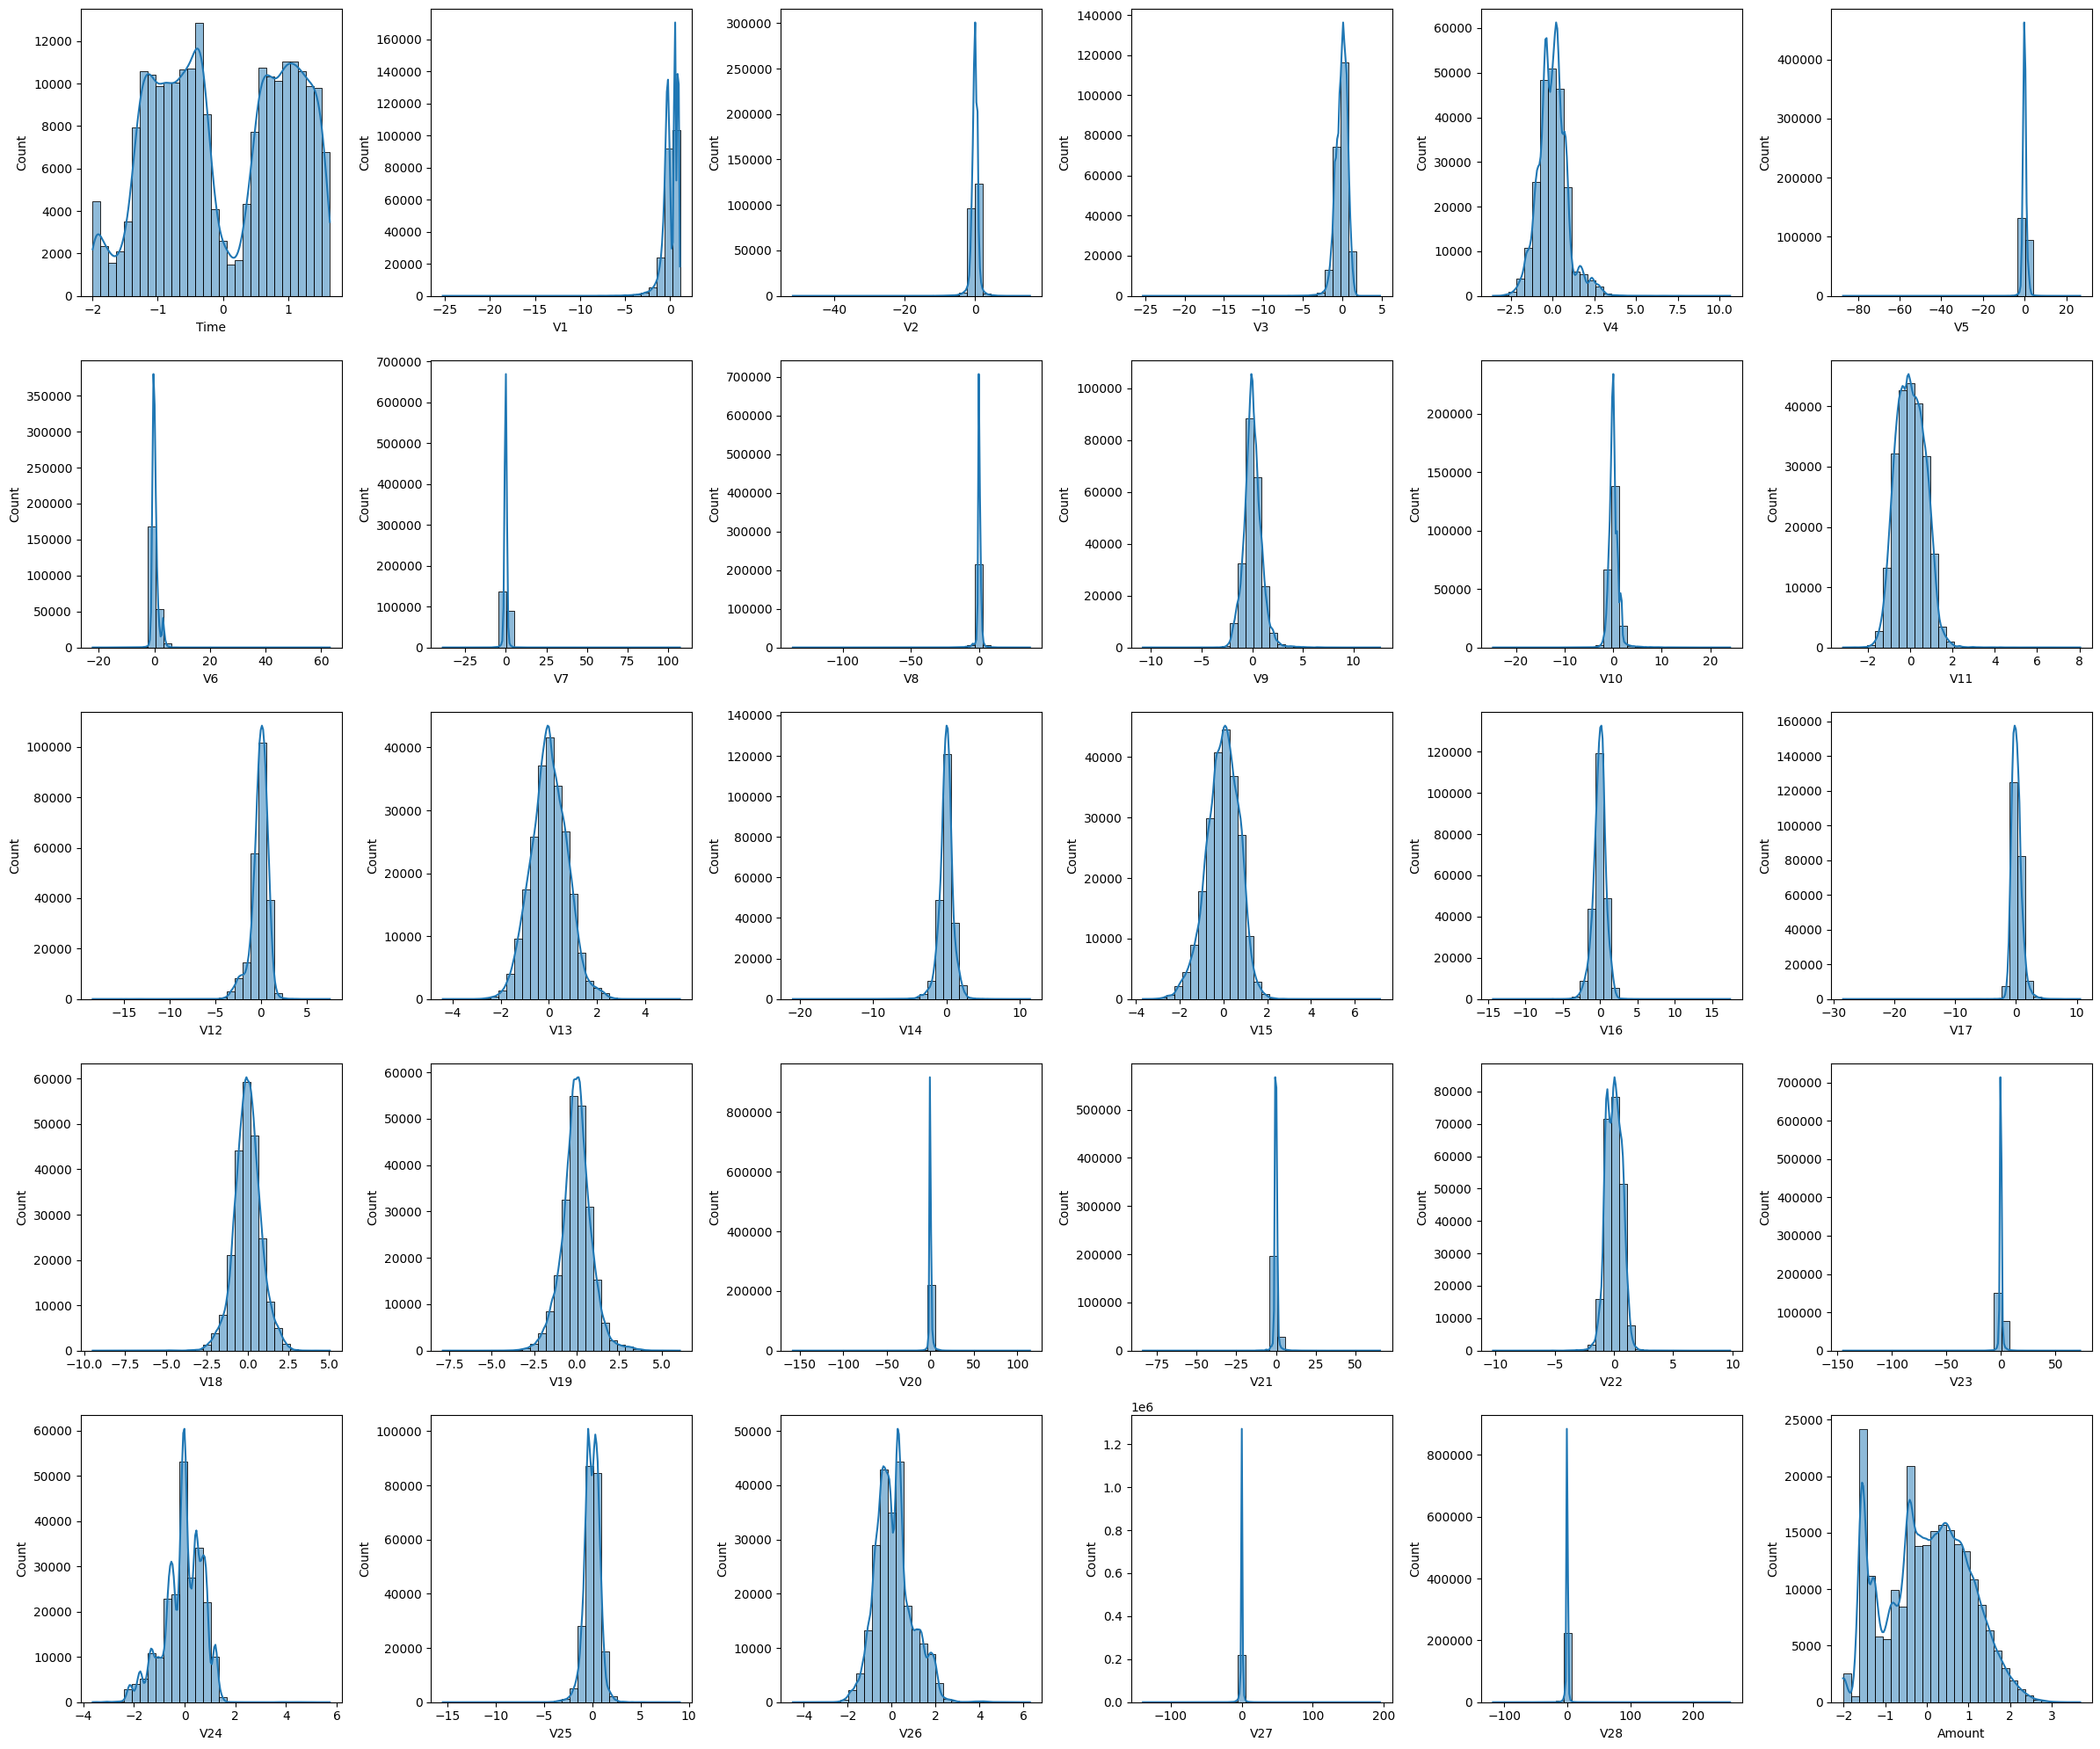

In [72]:
# Optional plot (takes some time to run)
hist_plot_all_features(X_train_scaled)

Plotting: 100%|█████████████████████████████████████████████████████| 30/30 [00:12<00:00,  2.37it/s]


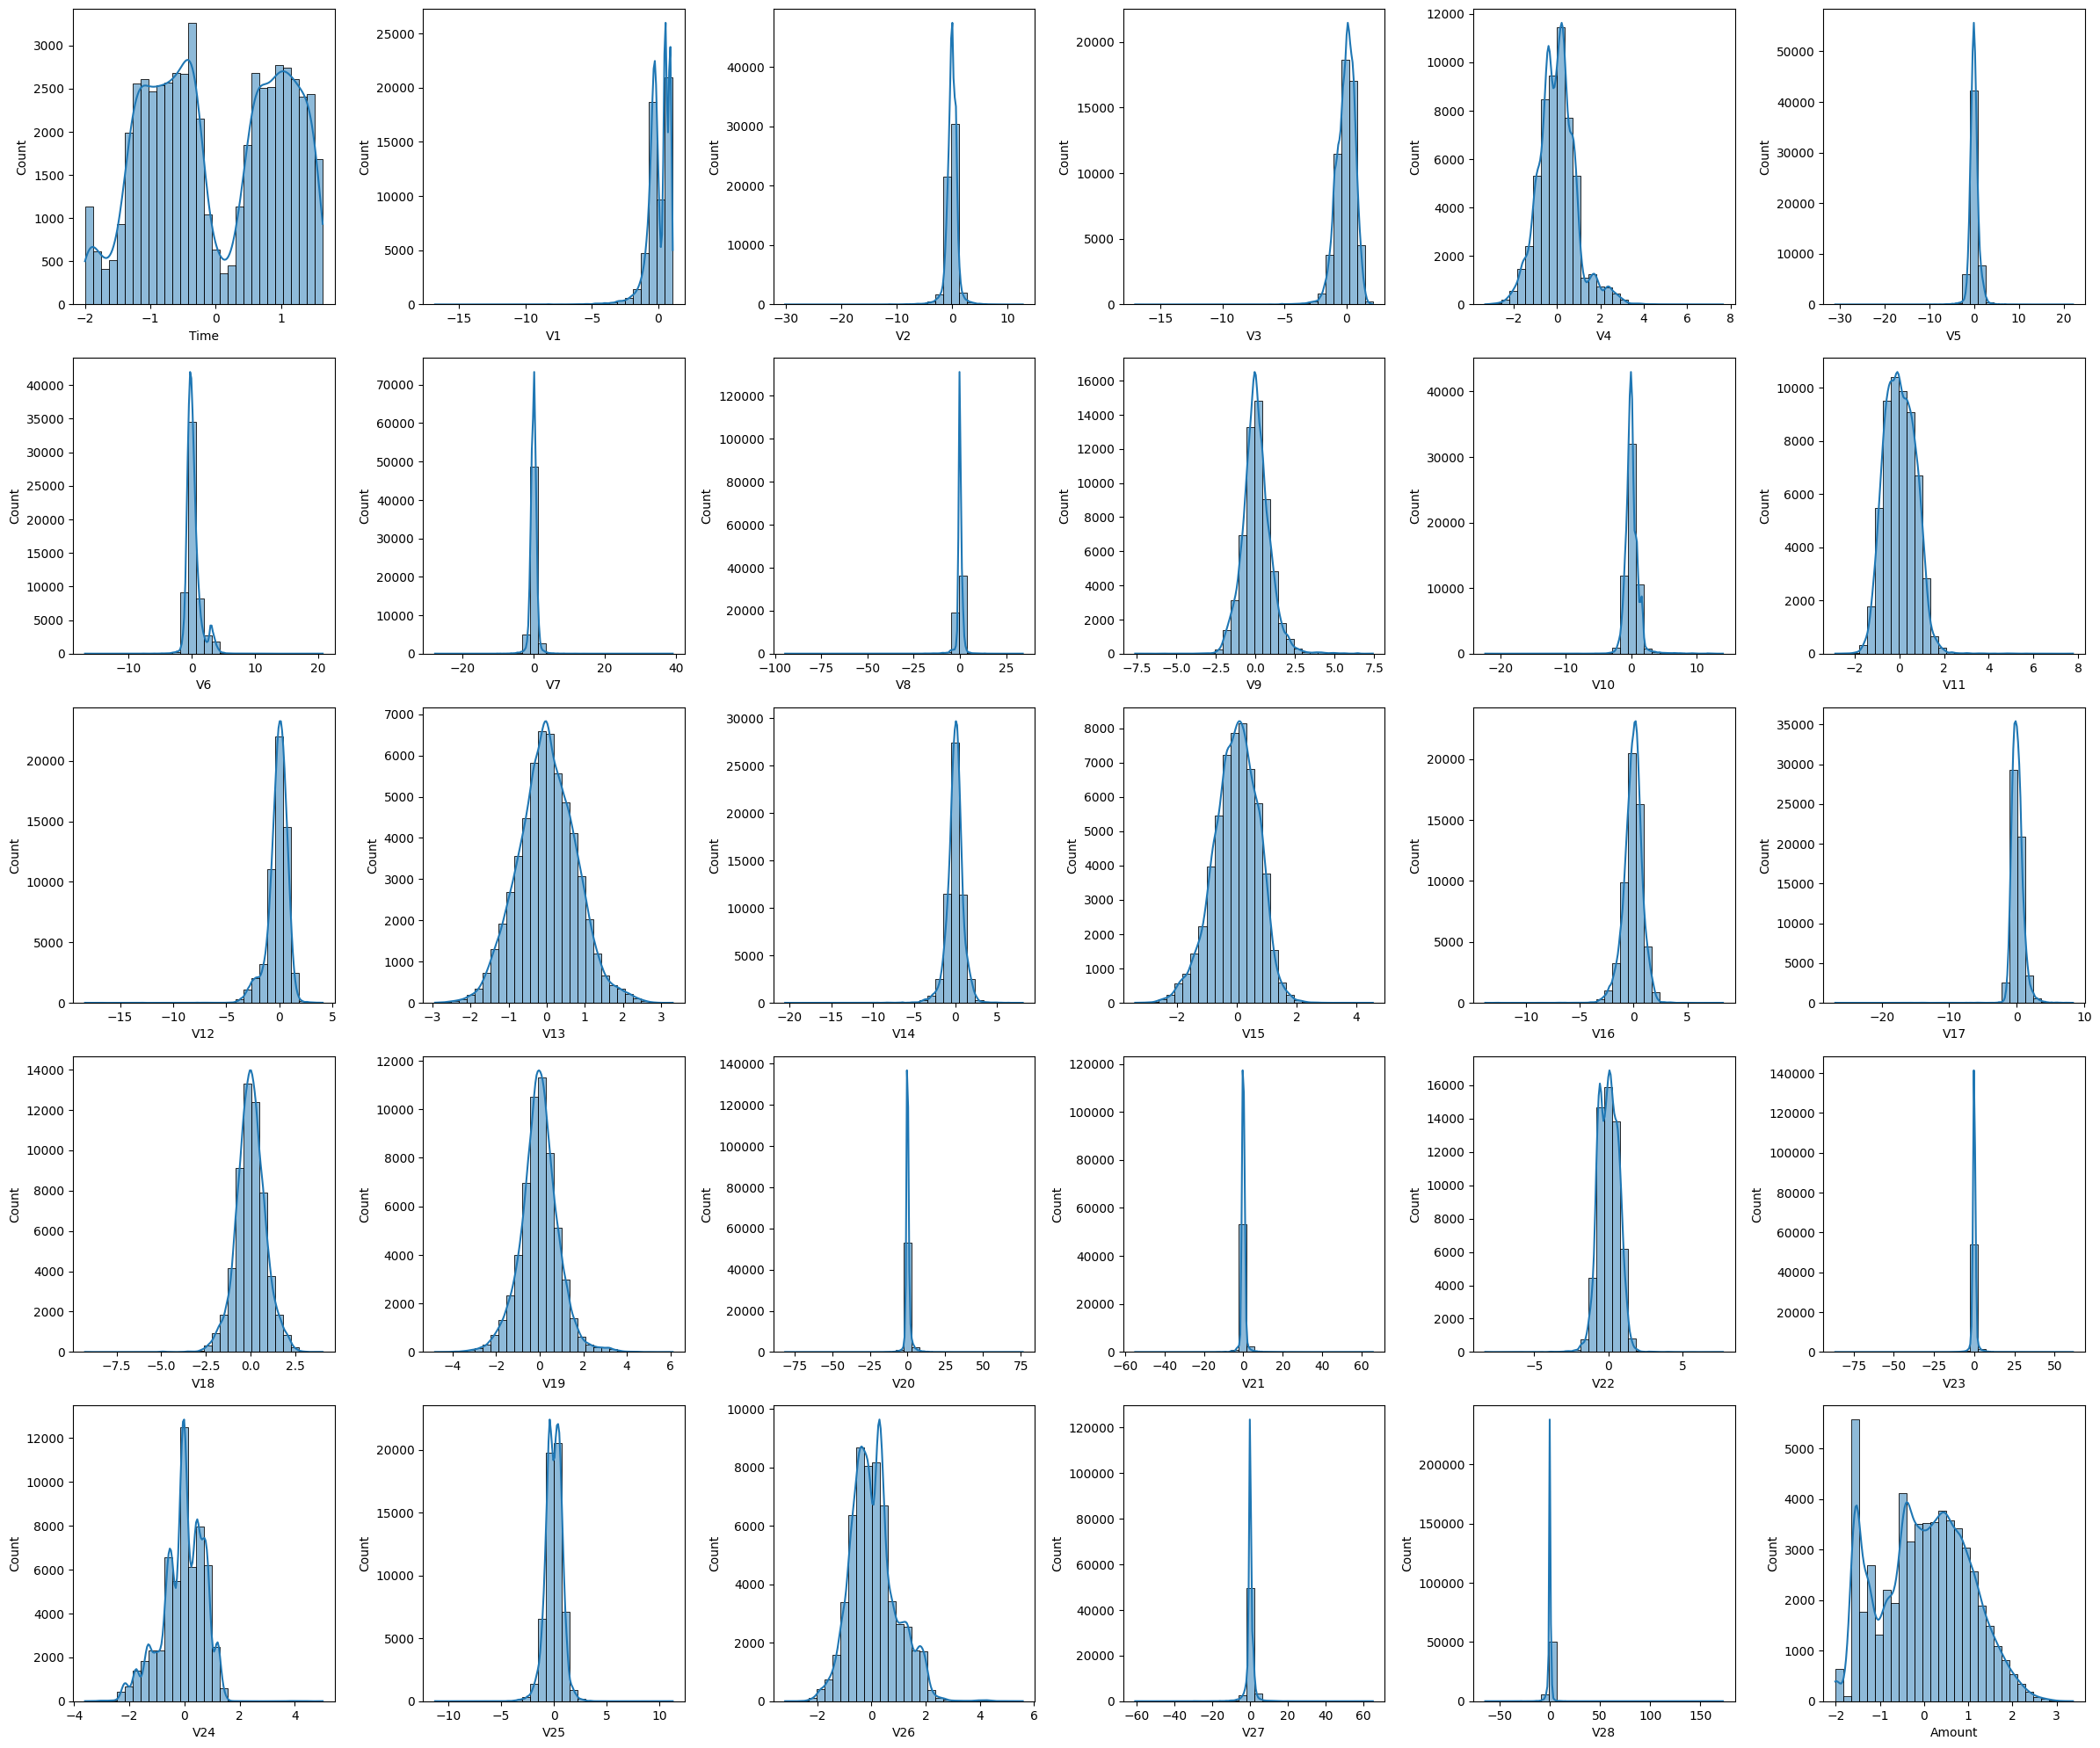

In [73]:
# Optional plot (takes some time to run)
hist_plot_all_features(X_test_scaled)

Now the distributions look a lot better regularized whilst keeping the most information they could. It is time to handle the class imbalance.

# 3 - Handling Class Imbalance
To fix the class imbalance problem, I will use an approach called **SMOTE** (Synthetic Minority Over-sampling Technique). This approach aims to create synthetic examples from the minority class by interpolating between multiple examples of that class. Why do we need something like this? Because the training data is almost all non-fraud cases in this example and the model will learn to predict almost everything as non-fraud which is very accurate but useless as it will not be able to predict actual fraud transactions.

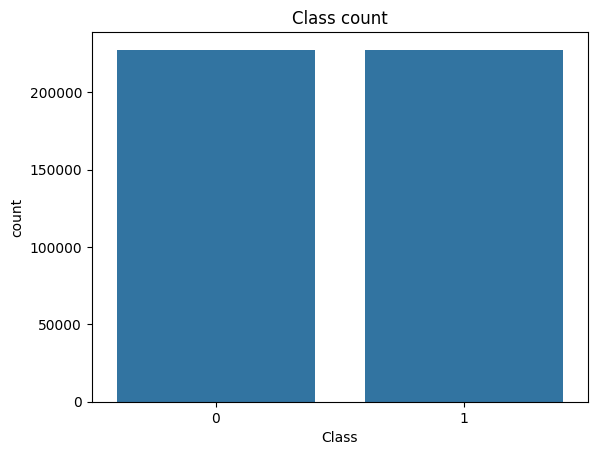

In [74]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy="minority", random_state=42)

# Run SMOTE on the dataset
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Plot the count
_ = sns.countplot(y_train_smote, x="Class").set(title="Class count")

And in a blink, 500~ samples of fraud transactions turned into 200000~ samples. Now the model can actually learn how to classify between fraudulent and genuine transactions.
# 4 - Model Training & Evaluation
Our data looks finally ready to train a model on. So let's start with building models and comparing their performances. At first, I want to train a **Logistic Regression** model on the data that had the class imbalance so that the comparison is clear.

In [75]:
def train_model(train_data: pd.DataFrame, test_data: pd.DataFrame, train_labels, model_type = "LR", return_model = False) :

  # Check model type
  if model_type == "LR":
    model = LogisticRegression(random_state=42)
  elif model_type =="DTC": # Corrected from "DTR" to "DTC"
    model = DecisionTreeClassifier(random_state=42)
  else:
    return

  # Fit the class imbalance data after flattening y_train into a 1d array
  model.fit(train_data, train_labels.values.ravel())

  # Predict on test data
  predictions = model.predict(test_data)

  # Return model if requested, otherwise return predictions
  if return_model:
      return model, predictions
  else:
      return predictions

In [76]:
# Train the model
model_baseline, pred_lr_baseline = train_model(X_train_scaled, X_test_scaled, y_train, "LR", True)

Okay I trained the baseline model but I need something that I can compare the different models on. For classification problems, **Precision** and **Recall** values are the most widely used metrics. So let's start by preparing a function to calculate them. In order to calculate these metrics, I need to compare the predictions to actual labels and also calculate the amounts of True Positive, False Positive and False Negative values.

In [77]:
def calculate_metrics(predictions, actual) :

  # Must be the same size
  if len(predictions) != len(actual):
    return
  tp = 0
  fp = 0
  fn = 0
  tn = 0

  # For every prediction check if it was correct
  for i, pred in enumerate(predictions) :
    if predictions[i] == 1 and actual[i] == 1:
      tp += 1
    elif predictions[i] == 1 and actual[i] == 0:
      fp += 1
    elif predictions[i] == 0 and actual[i] == 1:
      fn += 1
    elif predictions[i] == 0 and actual[i] == 0:
      tn += 1

  precision = tp / (tp + fp) if (tp + fp) > 0 else 0
  recall = tp / (tp + fn) if (tp + fn) > 0 else 0
  f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  # Create a metrics dataframe
  metrics = pd.DataFrame({
      "TP": [tp],
      "FP": [fp],
      "FN": [fn],
      "TN": [tn],
      "Precision": [precision],
      "Recall": [recall],
      "F1 Score": [f1]
  })

  return metrics

The evaluation function is ready. For now let's compare the model trained on the class imbalance dataset with the model trained on the SMOTE dataset.

In [78]:
# Calculate the baseline model's metrics
metrics_lr_baseline = calculate_metrics(pred_lr_baseline, y_test.values.ravel())

# Show metrics
metrics_lr_baseline.head()

,TP,FP,FN,TN,Precision,Recall,F1 Score
0,64,13,34,56851,0.831169,0.653061,0.731429


Now it is time to train a model on the SMOTE applied dataset.

Plotting: 100%|█████████████████████████████████████████████████████| 30/30 [01:09<00:00,  2.32s/it]


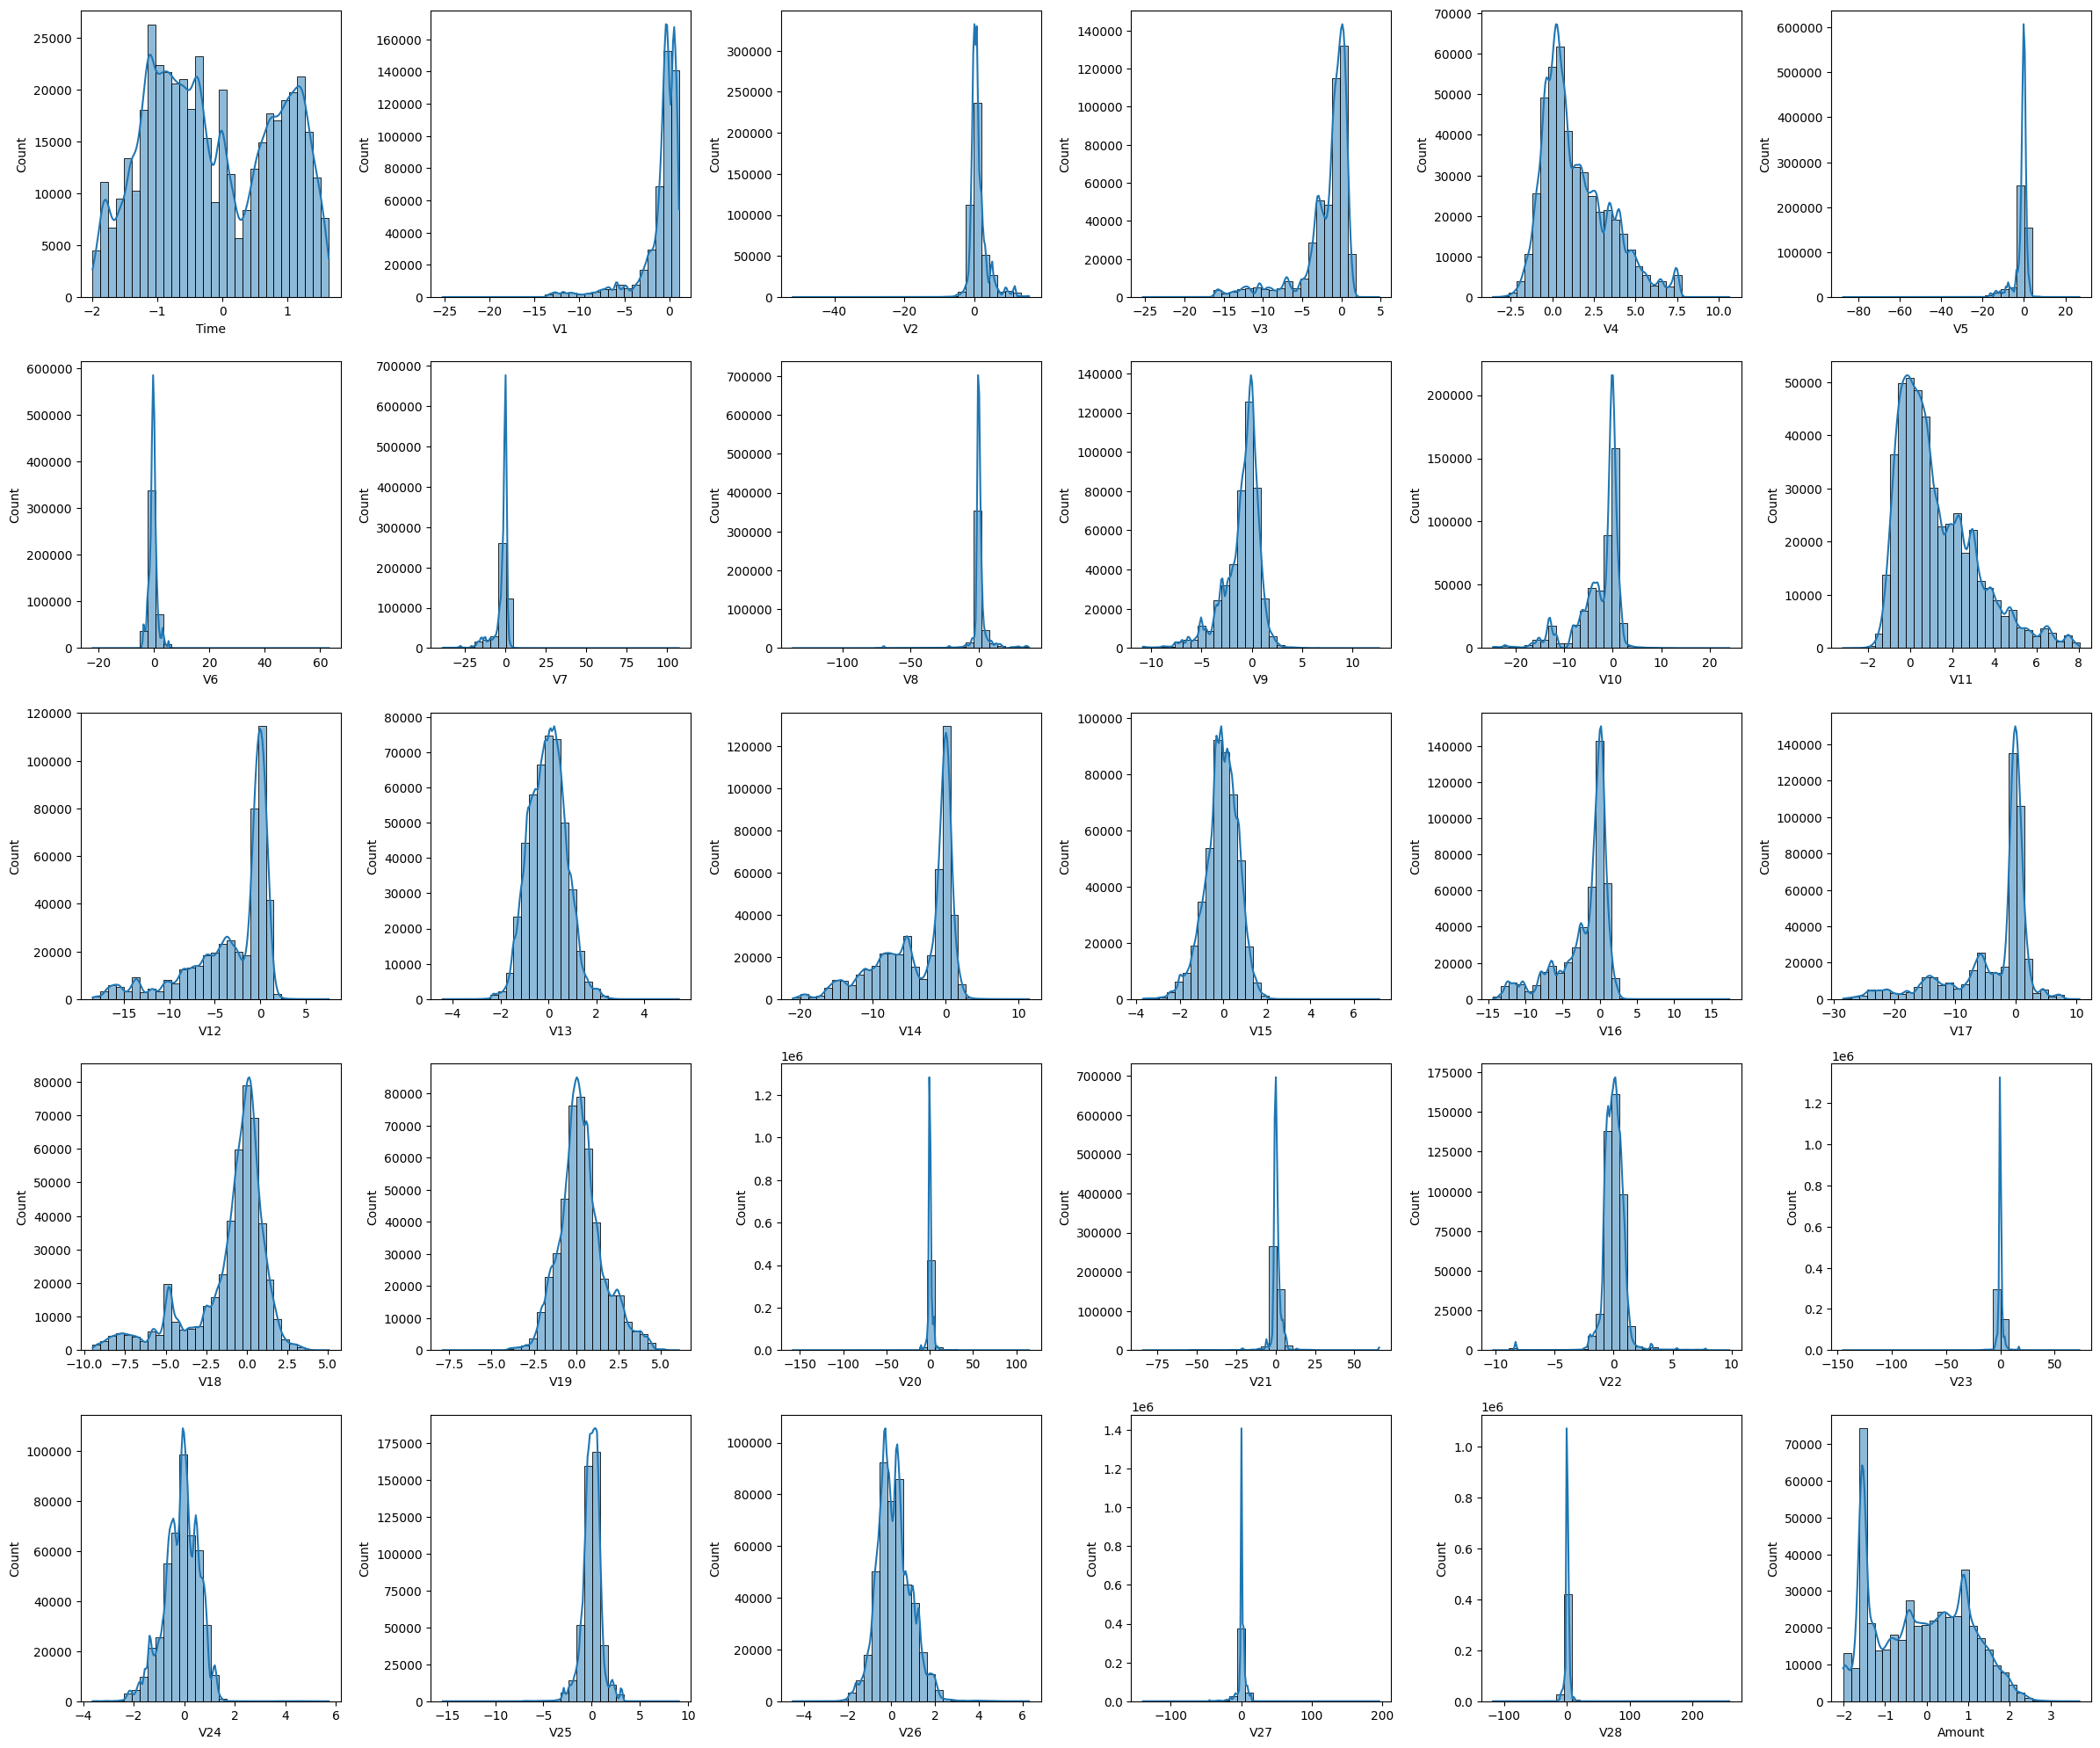

In [79]:
# Optional plot, takes time
hist_plot_all_features(X_train_smote)

In [80]:
# Train model on smote
model_smote, pred_lr_smote = train_model(X_train_smote, X_test_scaled, y_train_smote, "LR", True)

In [81]:
# Calculate the model's metrics
metrics_lr_smote = calculate_metrics(pred_lr_smote, y_test.values.ravel())

# Show metrics
metrics_lr_smote.head()

,TP,FP,FN,TN,Precision,Recall,F1 Score
0,90,1435,8,55429,0.059016,0.918367,0.110906


Turns out SMOTE with the "minority" strategy made the model's Precision plummet hard. Recall improved quite a lot but this is a perfect example for Precision-Recall tradeoff. In credit card fraud case, missing actual fraudulent transactions is extremely bad and false alerts are annoying but minimizing them is not as important as maximizing actual fraud detection. Though if false alarms increase by a lot compared to the increase of correct fraud detections, the workload will also increase exponentially and this is to be avoided. So what I will try to do is trying out different SMOTE strategy thresholds so that the model is the best at actual fraud detection (max TP, min FN) and doesn't ring the alarms for too many genuine cases while having a light workload.

In [82]:
def smote_analysis(data_train, data_test, labels_train, labels_test, model_type) :
  # Decide on thresholds
  thresholds = [x / 100.0 for x in range(5, 105, 5)]

  # Create a DataFrame, including the 'threshold' column
  metrics = pd.DataFrame(columns=['threshold', 'TP','FP','FN','TN','Precision','Recall','F1 Score'])

  # Initialize tqdm outside the loop and iterate over it
  tqdm_bar = tqdm(thresholds, total=len(thresholds), ncols=100)
  for threshold in tqdm_bar :
    # Update the description inside the loop
    tqdm_bar.set_description(f"SMOTE Analysis (Threshold: {threshold:.2f})")

    # Initialize SMOTE
    smote = SMOTE(sampling_strategy=threshold, random_state=42)

    # Run SMOTE on the dataset
    X_train, y_train = smote.fit_resample(data_train, labels_train)

    # Train model on smote
    pred = train_model(X_train, data_test, y_train, model_type)

    # Calculate the model's metrics
    new_metrics_row = calculate_metrics(pred, labels_test.values.ravel())

    # Add the current threshold to the new metrics row
    new_metrics_row['threshold'] = threshold

    # Use pd.concat to append the new row, reordering columns to match 'metrics'
    metrics = pd.concat([metrics, new_metrics_row[metrics.columns]], ignore_index=True)

  return metrics

In [83]:
# Takes some time
comparative_metrics_lr = smote_analysis(X_train_scaled, X_test_scaled, y_train, y_test, "LR")

SMOTE Analysis (Threshold: 0.05):   0%|                                      | 0/20 [00:00<?, ?it/s]/tmp/ipython-input-1577566022.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics = pd.concat([metrics, new_metrics_row[metrics.columns]], ignore_index=True)
SMOTE Analysis (Threshold: 1.00): 100%|█████████████████████████████| 20/20 [01:13<00:00,  3.67s/it]


In [84]:
comparative_metrics_lr

,threshold,TP,FP,FN,TN,Precision,Recall,F1 Score
0,0.05,86,70,12,56794,0.551282,0.877551,0.677165
1,0.10,87,161,11,56703,0.350806,0.887755,0.502890
2,0.15,87,265,11,56599,0.247159,0.887755,0.386667
3,0.20,87,334,11,56530,0.206651,0.887755,0.335260
4,0.25,88,386,10,56478,0.185654,0.897959,0.307692
5,0.30,88,445,10,56419,0.165103,0.897959,0.278922
6,0.35,88,500,10,56364,0.149660,0.897959,0.256560
7,0.40,88,556,10,56308,0.136646,0.897959,0.237197
8,0.45,88,632,10,56232,0.122222,0.897959,0.215159
9,0.50,88,714,10,56150,0.109726,0.897959,0.195556


Through systematic SMOTE threshold testing. I have come to the conclusion that in this specific example, the threshold 0.05 provides the best outcome. As the threshold increases the model detects more fraud transactions correctly but the false alarms increase exponentially as well which is unsustainable. With the threshold 0.05, the model is able to get 86/98 frauds and only give false alarm for 70 transactions. While that is not perfect in any capacity, it is the best choice here as for example the threshold 0.75 only gets 4 more actual fraud transactions while giving 1076 false alarms because of this.<br><br>
Now that it is obvious that SMOTE or a similar approach is needed for heavy class imbalance, let's try a different comparison. This time for the classification model. Next up is a **Tree Classifier**.

In [85]:
# Train tree model on smote, takes some time
model_dtc_smote, pred_dtc_smote = train_model(X_train_smote, X_test_scaled, y_train_smote, "DTC", True)

In [86]:
# Calculate the model's metrics
metrics_dtc_smote = calculate_metrics(pred_dtc_smote, y_test.values.ravel())

# Show metrics
metrics_dtc_smote.head()

,TP,FP,FN,TN,Precision,Recall,F1 Score
0,74,144,24,56720,0.33945,0.755102,0.468354


Let's run the SMOTE analysis on the Decision Tree for good measure.

In [87]:
# Run smote analysis on DTC, takes a long time
comparative_dtc_metrics = smote_analysis(X_train_scaled, X_test_scaled, y_train, y_test, "DTC")

SMOTE Analysis (Threshold: 0.05):   0%|                                      | 0/20 [00:00<?, ?it/s]/tmp/ipython-input-1577566022.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics = pd.concat([metrics, new_metrics_row[metrics.columns]], ignore_index=True)
SMOTE Analysis (Threshold: 1.00): 100%|█████████████████████████████| 20/20 [16:10<00:00, 48.51s/it]


In [88]:
comparative_dtc_metrics

,threshold,TP,FP,FN,TN,Precision,Recall,F1 Score
0,0.05,79,128,19,56736,0.381643,0.806122,0.518033
1,0.10,79,131,19,56733,0.376190,0.806122,0.512987
2,0.15,78,152,20,56712,0.339130,0.795918,0.475610
3,0.20,81,167,17,56697,0.326613,0.826531,0.468208
4,0.25,76,179,22,56685,0.298039,0.775510,0.430595
5,0.30,72,165,26,56699,0.303797,0.734694,0.429851
6,0.35,72,159,26,56705,0.311688,0.734694,0.437690
7,0.40,74,176,24,56688,0.296000,0.755102,0.425287
8,0.45,74,168,24,56696,0.305785,0.755102,0.435294
9,0.50,79,133,19,56731,0.372642,0.806122,0.509677


As seen on the image, the threshold 0.05 looks the best for the **Decision Tree Classifier**. The most amount of detected fraud transactions is 81 with threshold 0.20 but it also adds 39 more false positives. That is actually good as well but proportionally just 128 false alarms is great for 79 true fraud transaction detections.<br><br>
Comparing both models at threshold 0.05, **Logistic Regression** achieves 86 TP with 70 FP (55% precision), while **Decision Tree** achieves 79 TP with 128 FP (38% precision). **Logistic Regression** demonstrates superior performance with 7 additional fraud detections and 58 fewer false alarms, making it the optimal model for this fraud detection task.
# 5 - Visualization
Seeing the metrics in numeric form is nice but I have a better way to do this. Let's visualize them as well. For this, I will use **Precision-Recall Curves**, **ROC Curves** and **Confusion matrices**. At first, let's train both models with their optimal SMOTE thresholds.

In [89]:
# Initialize optimal SMOTE for both
smote_lr_opt = SMOTE(sampling_strategy=0.05, random_state=42)
smote_dtc_opt = SMOTE(sampling_strategy=0.05, random_state=42)

# Run SMOTE on the datasets
X_train_smote_lr, y_train_smote_lr = smote_lr_opt.fit_resample(X_train_scaled, y_train)
X_train_smote_dtc, y_train_smote_dtc = smote_dtc_opt.fit_resample(X_train_scaled, y_train)

# Train models on the new datasets
model_lr_opt, pred_lr_opt = train_model(X_train_smote_lr, X_test_scaled, y_train_smote_lr, "LR", True)
model_dtc_opt, pred_dtc_opt = train_model(X_train_smote_dtc, X_test_scaled, y_train_smote_dtc, "DTC", True)

Now prepare the metric plotting function.

In [90]:
def metrics_plot(model, test_data, test_labels, predictions):
    # Get probability predictions
    y_probs = model.predict_proba(test_data)[:, 1]

    # Create composite plot
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    axs = axs.flatten()

    # Precision-Recall Curve (needs probabilities)
    prec, rec, _ = precision_recall_curve(test_labels, y_probs)
    PrecisionRecallDisplay(precision=prec, recall=rec).plot(ax=axs[0])

    # ROC Curve (needs probabilities)
    fpr, tpr, _ = roc_curve(test_labels, y_probs)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=axs[1])

    # Confusion Matrix (uses predictions)
    cm = confusion_matrix(test_labels, predictions)
    ConfusionMatrixDisplay(cm).plot(ax=axs[2])

    # Fix overlap
    fig.tight_layout()
    plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


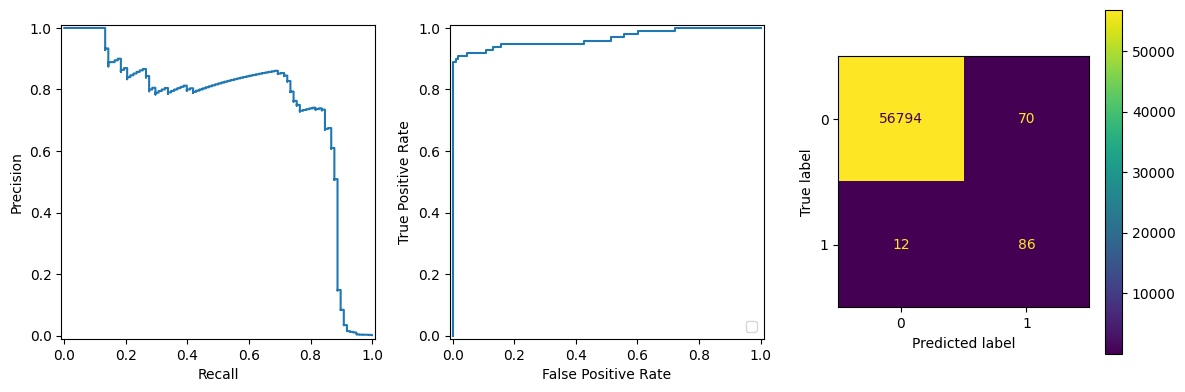

In [91]:
# LR
metrics_plot(model_lr_opt, X_test_scaled, y_test, pred_lr_opt)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


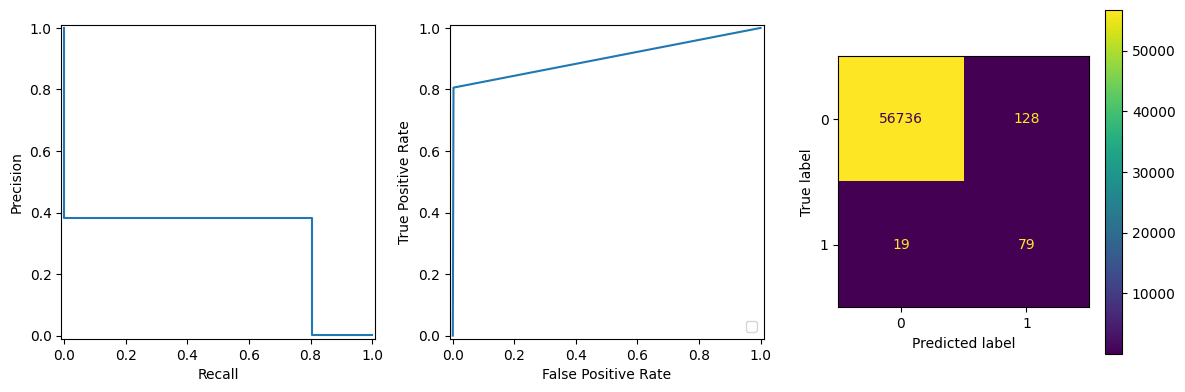

In [92]:
# DTC
metrics_plot(model_dtc_opt, X_test_scaled, y_test, pred_dtc_opt)

As expected, **Precision-Recall** curves show the trade off between the two metrics. The **ROC** curve on the other hand, tell us that in order to increase fraud detections, we will need to unavoidably increase our false alarm rate as well. Finally, the confusion matrix is plotted to see exactly how many of these correct/incorrect detections we have.<br><br>
Turns out in this specific example, a Logistic Regression model trained on the dataset on which SMOTE is applied with a sampling strategy of 0.05 is the best at credit card fraud detection.
# 6 - Key Findings
*   Some datasets may have different problems like heavy class imbalance even if they have no missing values.
*   Different features in the same dataset may require different scaling strategies in order to stay meaningful while helping the models converge.
*   Training models on heavily imbalanced datasets may be misleading as the model will most likely be very accurate on the training set while being useless in real cases.
*   Applying SMOTE is a great way to help fix the class imbalance in a dataset.
*   Different SMOTE thresholds lead to very different model performances so systematic analysis of those thresholds is paramount to finding the optimal way to use the method.
*   Different classification models also show very different performances on the same data and should be compared before selection.
*   For classification model evaluation/comparison, metrics such as Precision, Recall and F1 Score are widely used and are helpful.
*   In classification model selection, knowing what the model ultimately should be good at makes Precision-Recall trade-off problem less overwhelming to think about.
*  Confusion matrix is a great way to visualize exactly how many correct/incorrect decisions a model makes.

